# 1. Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as smf
import matplotlib.pyplot as plt
import statsmodels.stats.tests.test_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1 - Business Problem
Prepare a prediction model for profit of 50startups data
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

# 2 - Data collection and description

In [2]:
data = pd.read_csv("50_Startups.csv")

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [4]:
# Check for missing values

data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There is no null value in the dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

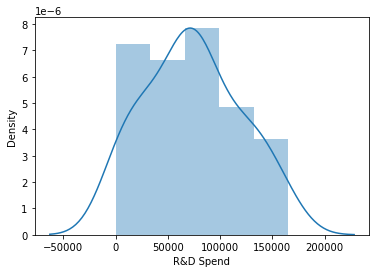

In [5]:
sns.distplot(data['R&D Spend'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

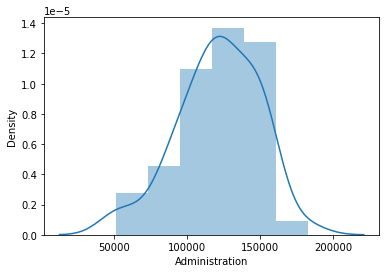

In [6]:
sns.distplot(data['Administration'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

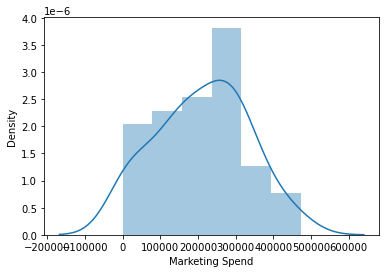

In [7]:
sns.distplot(data['Marketing Spend'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

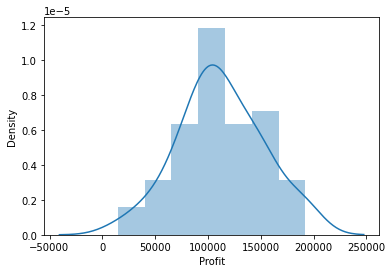

In [8]:
sns.distplot(data['Profit'])

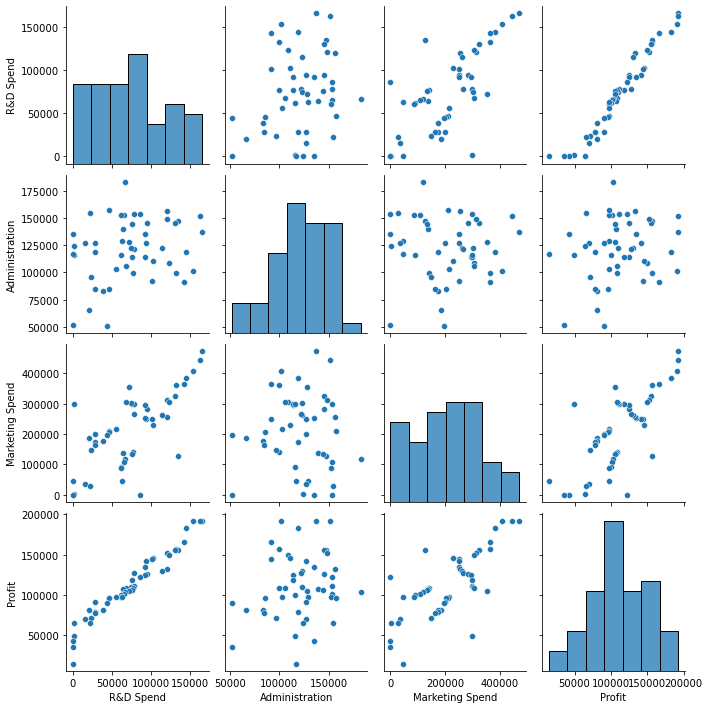

In [9]:
sns.pairplot(data)

In [10]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# 3 - Correlation Matrix

In [11]:
cor = data.corr()

<AxesSubplot:>

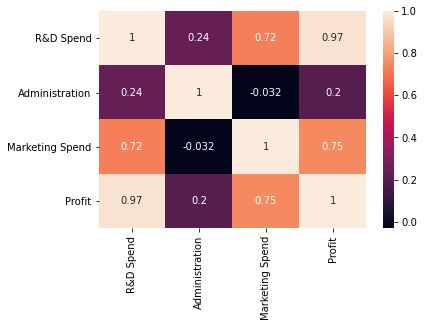

In [12]:
sns.heatmap(cor, annot=True)

R & D SPend and Profit are positively correlated.

Marketing Spent has correlation with R&D and profit.

Administration doesnt have any correlation.

# 4 - Regression Model

In [13]:
# Build Model

df = pd.get_dummies(data, columns=['State'])

df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [14]:
x = df[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida','State_New York']]
y = df[['Profit']]

In [15]:
model1 = smf.OLS(y,x).fit()
pred1 = model1.predict(x)
pred1

0     192390.571363
1     189071.320105
2     182276.186733
3     173584.976190
4     172277.133817
5     163473.807118
6     158099.292784
7     160155.644649
8     151634.743326
9     154829.662527
10    135664.642591
11    135528.600782
12    129282.917807
13    127431.248986
14    149694.382775
15    146143.635514
16    116854.074529
17    130085.409934
18    129149.725743
19    115594.188407
20    116570.734440
21    117201.505090
22    114833.305138
23    110123.796106
24    113294.373452
25    102200.268919
26    110765.301169
27    114279.804030
28    101818.587387
29    101721.042029
30     99629.010537
31     97617.296320
32     98988.236603
33     98061.358948
34     88974.704163
35     90420.009606
36     75423.092866
37     89577.702222
38     69606.521609
39     83684.976040
40     74762.746177
41     74956.311049
42     70575.993714
43     60100.268219
44     64585.147213
45     47588.364710
46     56272.992685
47     46468.232005
48     49123.073083
49     48185.038793


In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.34e-27
Time:                        15:17:05   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model1.params

R&D Spend               0.806023
Administration         -0.027004
Marketing Spend         0.026980
State_California    50125.343832
State_Florida       50324.132625
State_New York      50083.456813
dtype: float64

In [18]:
model1.tvalues

R&D Spend           17.368580
Administration      -0.517012
Marketing Spend      1.573889
State_California     7.280560
State_Florida        6.939569
State_New York       7.203572
dtype: float64

In [19]:
model1.pvalues

R&D Spend           2.578772e-21
Administration      6.077373e-01
Marketing Spend     1.226769e-01
State_California    4.444178e-09
State_Florida       1.401844e-08
State_New York      5.757175e-09
dtype: float64

In [20]:
(model1.rsquared,model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables (Administration and Marketing Spend) have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

# Solving Multicollinearity

# Finding Cook's Distance

In [21]:
infl = model1.get_influence()

In [22]:
summ = infl.summary_frame()

In [23]:
summ.sort_values('cooks_d',ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


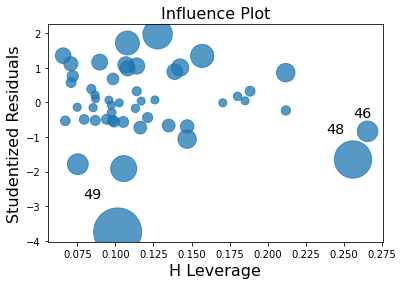

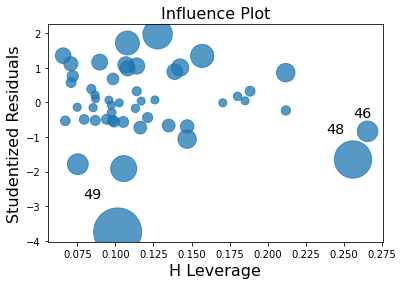

In [24]:
infl.plot_influence()

Index 48 and 49 has highest Cook's Distance

Thus it will be wise to drop this row from the data set

# Finding Variance Inflation Factor (VIF)

In [25]:
vif = pd.DataFrame()

In [26]:
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [27]:
vif['Features'] = x.columns

In [28]:
vif.round(1)

,VIF Factor,Features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


Administration has the lowest variance inflation factor We would need to discard this variables to improve model and try to solve multicolinearity.

In [29]:
x_new = df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [30]:
model = smf.OLS(y,x_new).fit()
pred = model.predict(x_new)
pred

0     192716.045225
1     189713.718878
2     181489.428305
3     173367.500227
4     171216.444327
5     162806.718655
6     158012.480026
7     160549.338195
8     152251.473717
9     154298.493451
10    135115.907863
11    134598.641954
12    129317.860381
13    127770.141039
14    150295.043405
15    145973.269034
16    116979.772435
17    130763.575443
18    128974.236897
19    115793.685843
20    116599.095937
21    118313.021192
22    115078.284890
23    109972.832315
24    112505.857458
25    102584.549900
26    111105.527691
27    114898.052900
28    103240.776813
29    102397.538638
30     99204.589241
31     98273.930179
32     98850.554265
33     97699.644041
34     90219.932792
35     89715.027502
36     75921.015546
37     87933.097789
38     68568.946276
39     82886.489100
40     75009.521046
41     74216.313367
42     70197.804086
43     60350.661250
44     65471.871971
45     47792.990538
46     56987.146723
47     46958.944984
48     47371.295924
49     48302.870349


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.72e-29
Time:                        15:17:07   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After we remove "Administration" from input variables list and run the model again, all the variables are significant.

# VISUALIZATIONS

Test for Normality of Residuals (Q-Q Plot)

Residual Vs Regression

Residual Plot for Homoscedasticity

High Influence points

Detecting Influencers/Outliers

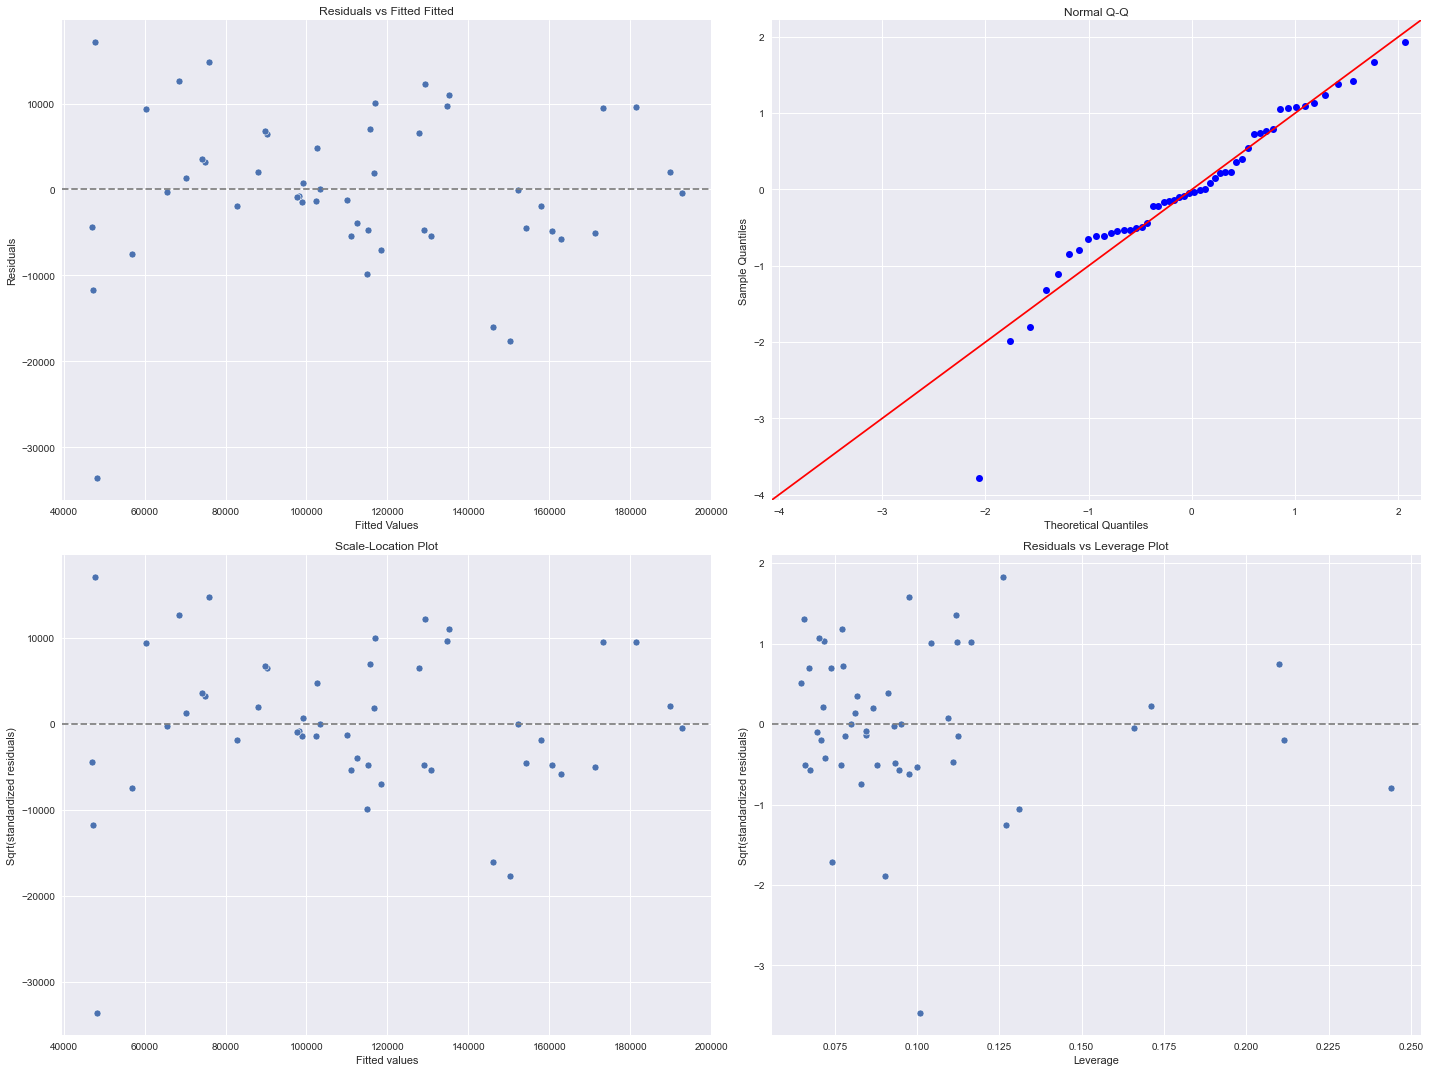

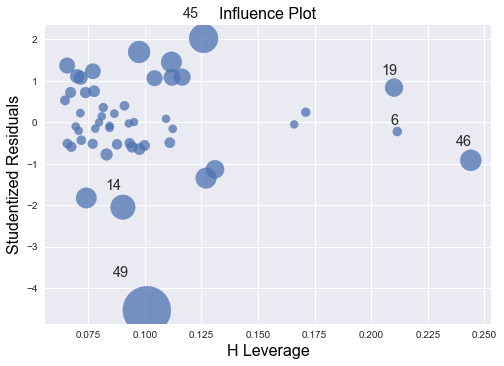

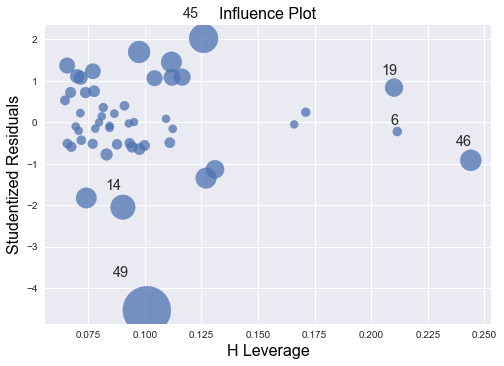

In [51]:
# Get different Variables for diagnostic
residuals = model.resid
fitted_value = model.fittedvalues
stand_resids = model.resid_pearson
influence = model.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted Fitted')
  
# Normal Q-Q plot
smf.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
# Scale-Location Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(standardized residuals)')
ax[1, 0].set_title('Scale-Location Plot')
  
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Sqrt(standardized residuals)')
ax[1, 1].set_title('Residuals vs Leverage Plot')
  
plt.tight_layout()
plt.show()
  
# PLot Cook's distance plot
smf.graphics.influence_plot(model, criterion="cooks")

# Final Model

In [32]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = df.drop(df.index[[49,48]])

In [33]:
#Removed Administration column which has multicollinearity
new_X = new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
new_Y = new_df[['Profit']]

In [34]:
final_model = smf.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [35]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.02e-29
Time:                        15:17:08   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
final_model.params

R&D Spend               0.769222
Marketing Spend         0.025139
State_California    51832.389729
State_Florida       50461.957109
State_New York      50903.841562
dtype: float64

In [37]:
final_model.tvalues

R&D Spend           22.071869
Marketing Spend      1.907631
State_California    19.120230
State_Florida       16.391256
State_New York      17.333291
dtype: float64

In [38]:
final_model.pvalues

R&D Spend           4.414607e-25
Marketing Spend     6.313181e-02
State_California    1.209877e-22
State_Florida       4.153538e-20
State_New York      5.117452e-21
dtype: float64

In [39]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9611488413298318, 0.9575347800581883)

# 5. Square Root Transformation

In [40]:
x_sqr = np.sqrt(new_X)
y_sqr = np.sqrt(new_Y)

In [41]:
model_sqr = smf.OLS(y_sqr, x_sqr).fit()
pred_sqr = model_sqr.predict(x_sqr)


In [42]:
model_sqr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.64e-24
Time:                        15:17:09   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model_sqr.params

R&D Spend             0.527112
Marketing Spend       0.023135
State_California    187.868894
State_Florida       187.016182
State_New York      189.807560
dtype: float64

In [44]:
model_sqr.tvalues

R&D Spend           17.371170
Marketing Spend      1.269533
State_California    25.465133
State_Florida       22.651671
State_New York      24.463140
dtype: float64

In [45]:
model_sqr.pvalues

R&D Spend           4.712691e-21
Marketing Spend     2.110791e-01
State_California    1.446737e-27
State_Florida       1.578214e-25
State_New York      7.289518e-27
dtype: float64

In [46]:
(model_sqr.rsquared,model_sqr.rsquared_adj)

(0.9294774791599976, 0.9229172446632532)

# 6. Output Interpretation

We will use final_model (Model before transformation ) as best model as it has best R square value.

1. p-value<0.01

The model is accepatable.

2. coefficient == 52.7
Thus if the value of x increased by 1, the predicted value of Profit will increase by 52.7

3. Adj. R-sqared == 95.7%

Thus the model explains 95.7% of the variance in dependent variable

# 2. Prepare a prediction model for predicting Price.

# 1 - Business Problem
Consider the toyotacorolla dataset and prepare a prediction model for predicting Price.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as smf
import matplotlib.pyplot as plt
import statsmodels.stats.tests.test_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2 - Data collection and description

In [53]:
data1 = pd.read_csv("ToyotaCorolla.csv")

In [54]:
data = data1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [55]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# EDA

In [56]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [57]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

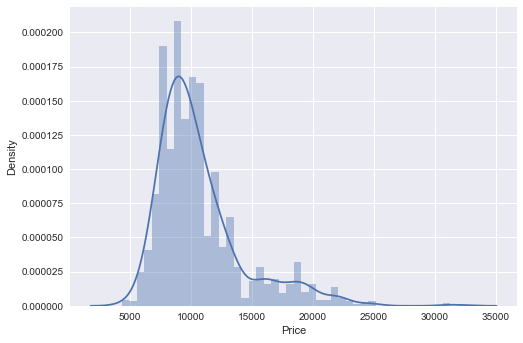

In [58]:
sns.distplot(data['Price'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_08_04', ylabel='Density'>

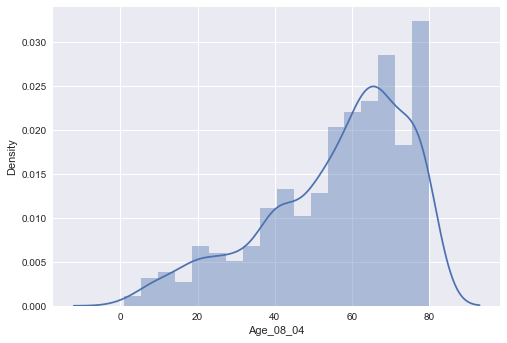

In [59]:
sns.distplot(data['Age_08_04'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

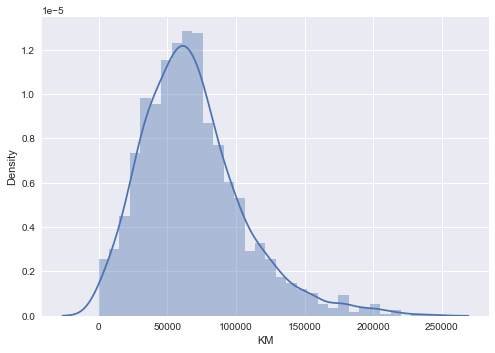

In [60]:
sns.distplot(data['KM'])


In [61]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

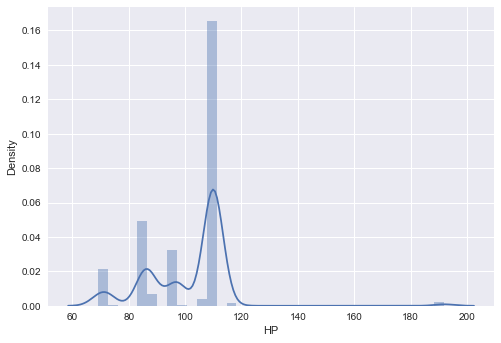

In [62]:
sns.distplot(data['HP'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

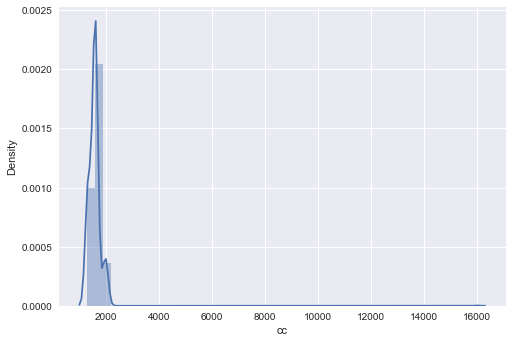

In [63]:
sns.distplot(data['cc'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

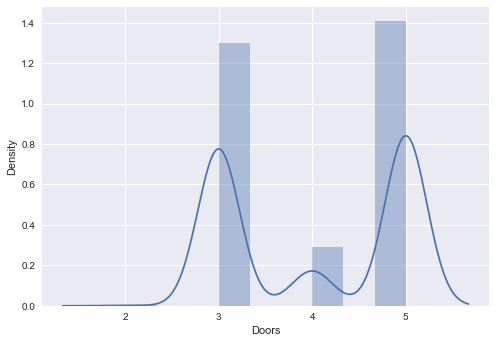

In [64]:
sns.distplot(data['Doors'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

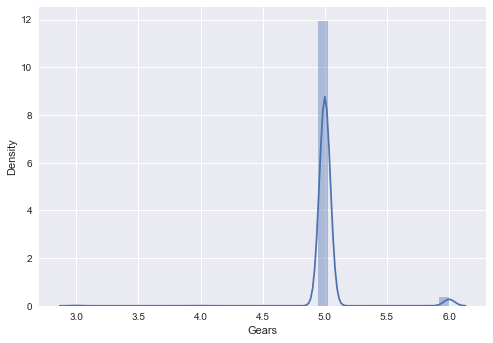

In [65]:
sns.distplot(data['Gears'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quarterly_Tax', ylabel='Density'>

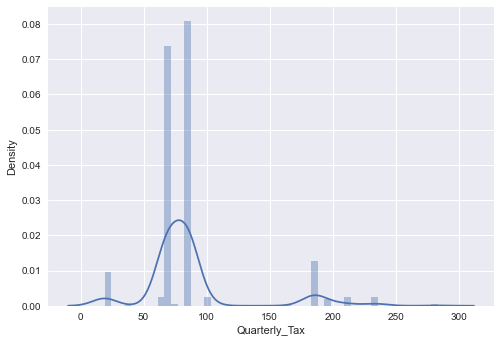

In [66]:
sns.distplot(data['Quarterly_Tax'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

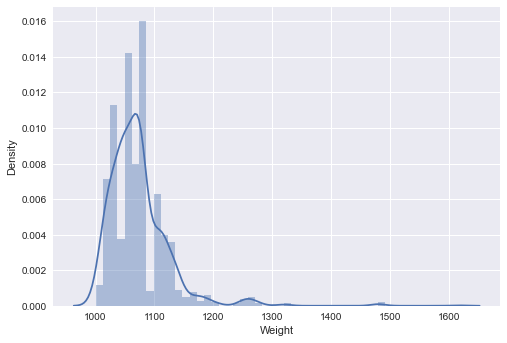

In [67]:
sns.distplot(data['Weight'])

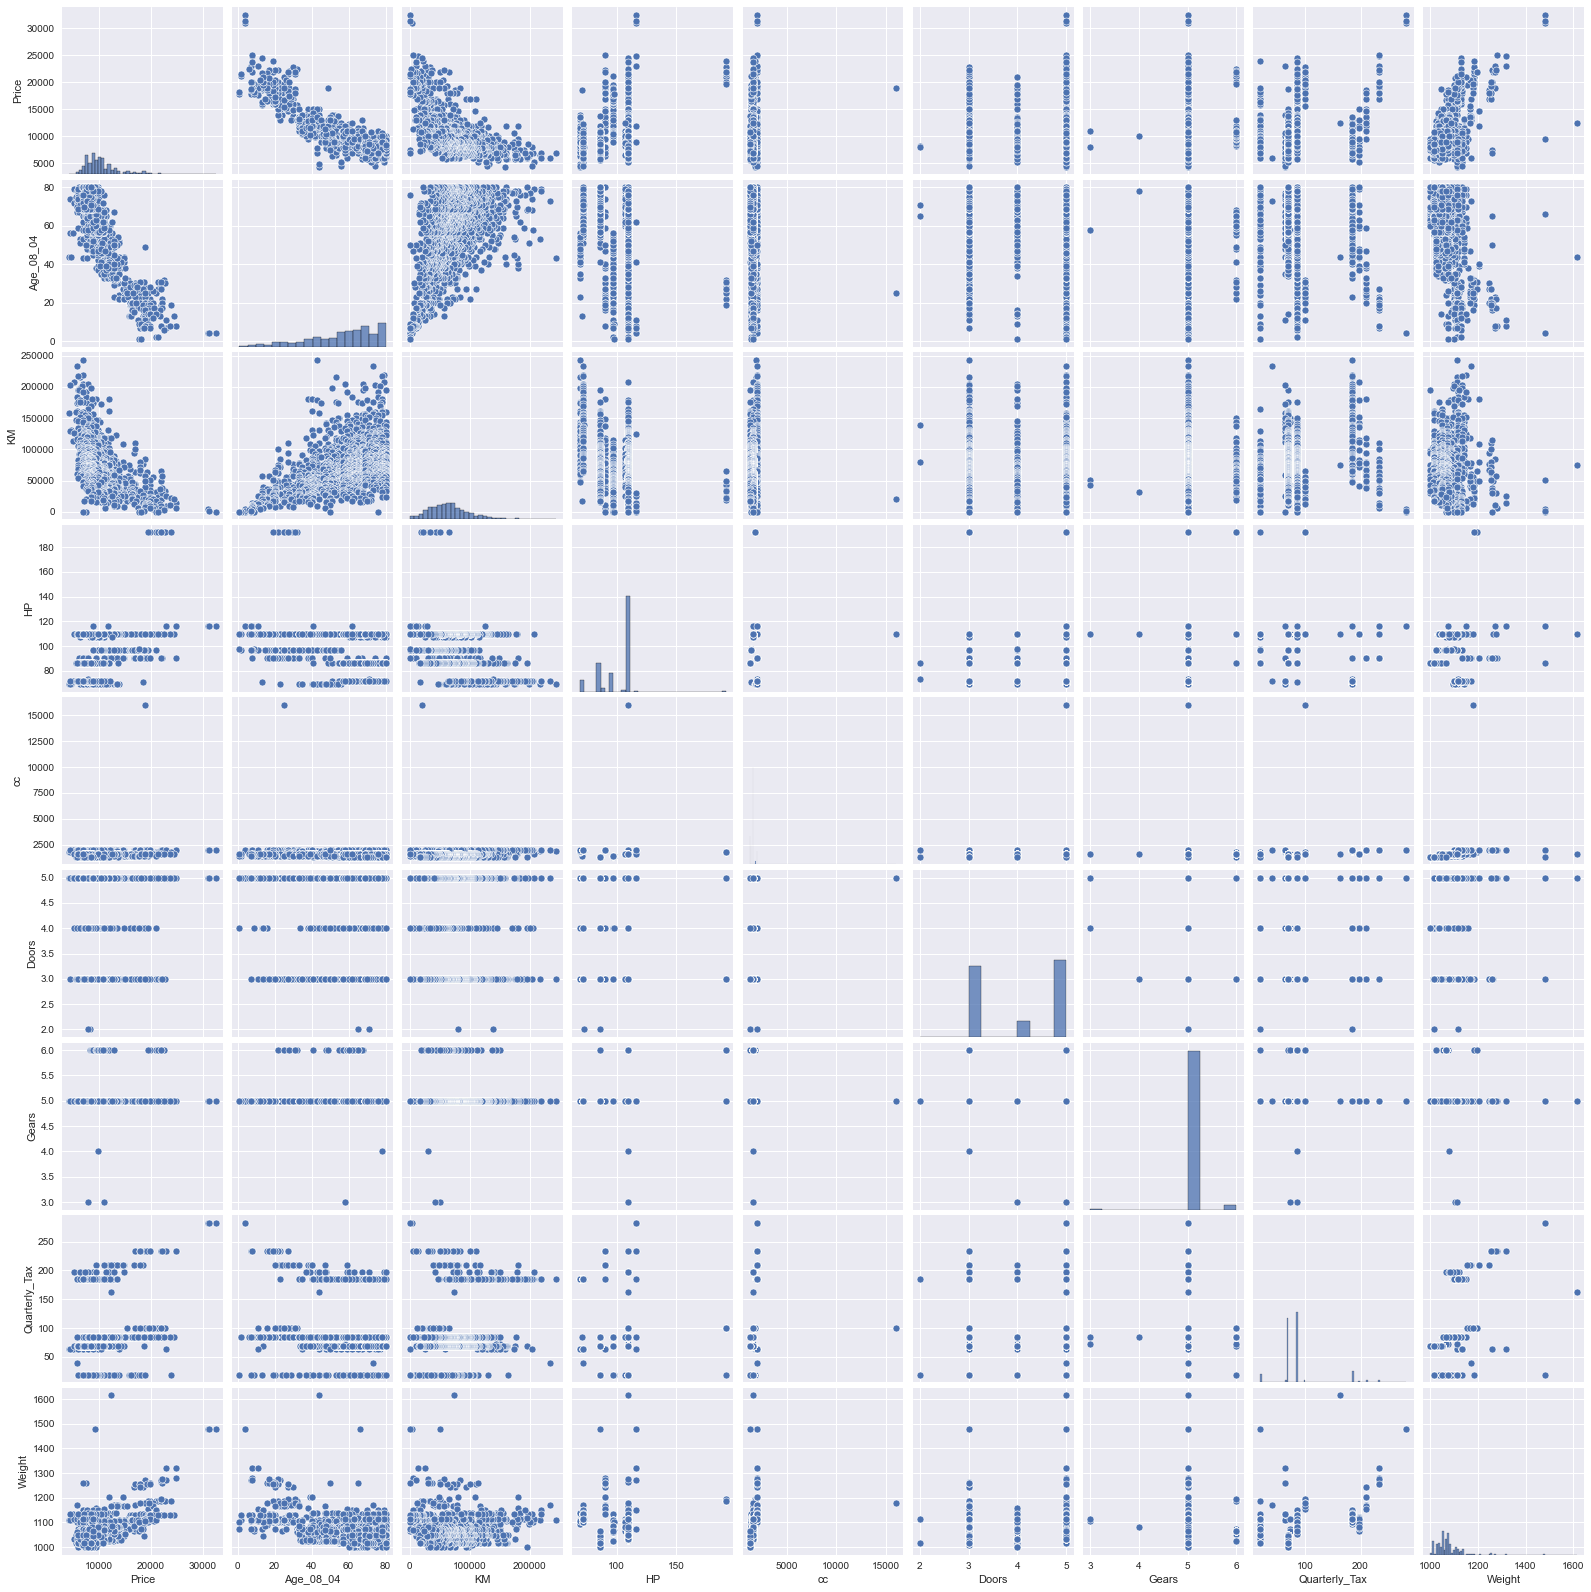

In [68]:
sns.pairplot(data)

# 3 - Correlation Matrix

In [69]:
cor = data.corr()

<AxesSubplot:>

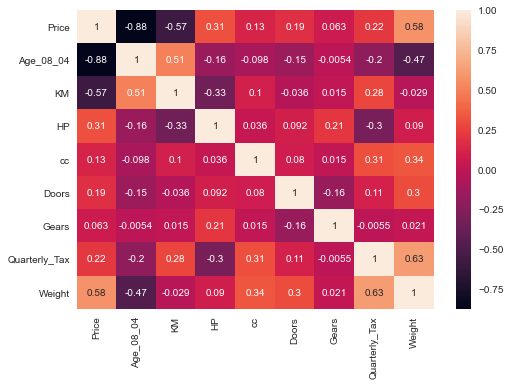

In [70]:
sns.heatmap(cor, annot=True)

Most of the data are positively correlated data

# 4 - Regression Model

In [71]:
x = data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y = data[["Price"]]

In [72]:
model = smf.OLS(y,x).fit()
pred = model.predict(x)

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:25:20   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4510      2.445    -51.303      0.000    -130.248    -120.654
KM               -0.0205      0.001    -16.305      0.000      -0.023      -0.018
HP               33.4737      2.796     11.973      0.000      27.990      38.958
cc               -0.1032      0.090     -1.141      0.254      -0.281       0.074
Doors            -7.2494     40.184     -0.180      0.857     -86.075      71.576
Gears            78.3780    148.258      0.529      0.597    -212.449     369.205
Quarterly_Tax     5.8258      1.227      4.748      0.000       3.419       8.233
Weight           14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R sq and p Value of the Model is Good and the model can be accepted. However as you can see not all variables  have acceptable p value. Thus we have Multicollinearity issue in our Data Frame

# Solving MultiCollinearity

# Finding Cook's Distance

In [74]:
infl = model.get_influence()

In [75]:
summ = infl.summary_frame()

In [76]:
summ.sort_values('cooks_d',ascending = False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.289686,-2.363023e+00,-2.781734,2.615263e+01,0.645518,0.905398,-4.283020,-3.611394,8.241996e+01,7.678996,0.917911,25.678000,7.839881,26.215988
221,-0.255051,-2.607849e-02,0.174427,4.179288e-01,0.553762,1.572311,0.558929,-1.690024,3.719885e-01,-6.154172,0.072850,-1.725082,-6.235259,-1.747812
960,-0.208597,3.740370e-02,0.443719,1.977218e-01,0.539659,0.995730,0.788653,-1.264022,2.083232e-01,-4.104460,0.090022,-1.290963,-4.127441,-1.298191
109,0.104572,-2.934313e-01,0.114571,-1.902240e-01,-0.220145,-0.606577,0.332191,0.558699,1.226360e-01,4.952891,0.038456,0.990499,4.994239,0.998768
601,-0.213100,3.186680e-01,0.385097,-1.107466e-01,0.404397,0.551158,0.429648,-0.747923,9.677099e-02,-5.594639,0.024137,-0.879868,-5.654999,-0.889361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-0.000069,-5.512316e-05,0.000142,6.568459e-05,0.000134,-0.000053,0.000083,-0.000039,1.558972e-08,-0.006835,0.002662,-0.000353,-0.006833,-0.000353
482,-0.000005,2.712110e-08,-0.000085,2.916558e-07,-0.000162,0.000013,-0.000026,0.000046,8.250836e-09,-0.006371,0.001623,-0.000257,-0.006369,-0.000257
1433,-0.000136,1.856487e-04,0.000104,1.209905e-05,0.000052,-0.000037,-0.000025,-0.000011,7.008564e-09,-0.002953,0.006388,-0.000237,-0.002952,-0.000237
397,-0.000015,4.001993e-05,0.000028,1.344847e-06,-0.000098,-0.000034,0.000125,0.000025,6.628524e-09,0.002440,0.008830,0.000230,0.002439,0.000230


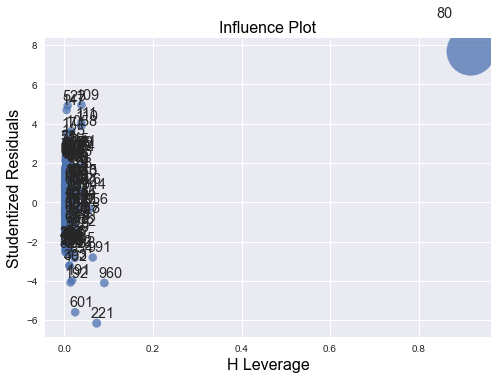

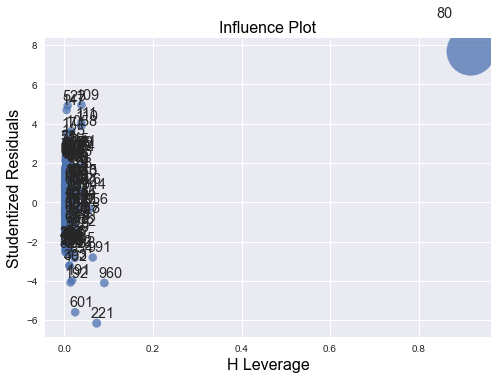

In [77]:
infl.plot_influence()

index 80 has highest cooks distance. We need to remove that data.

# Finding Variance Inflation Factor (VIF)

In [78]:
vif = pd.DataFrame()

In [79]:
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [80]:
vif["features"] = x.columns

In [81]:
vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


Gears and Weight have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables to improve model and try to solve multicolinearity.

In [82]:
# Removed Weight fron the dataframe and Tested the model
new_X = data[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

In [83]:
new_model = smf.OLS(y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [84]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:25:27   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see, once we remove "Weight" from input variables and run the model again, all the variables are significant.

# VISUALIZATIONS¶

Test for Normality of Residuals (Q-Q Plot)

Residual Vs Regression

Residual Plot for Homoscedasticity

High Influence points

Detecting Influencers/Outliers

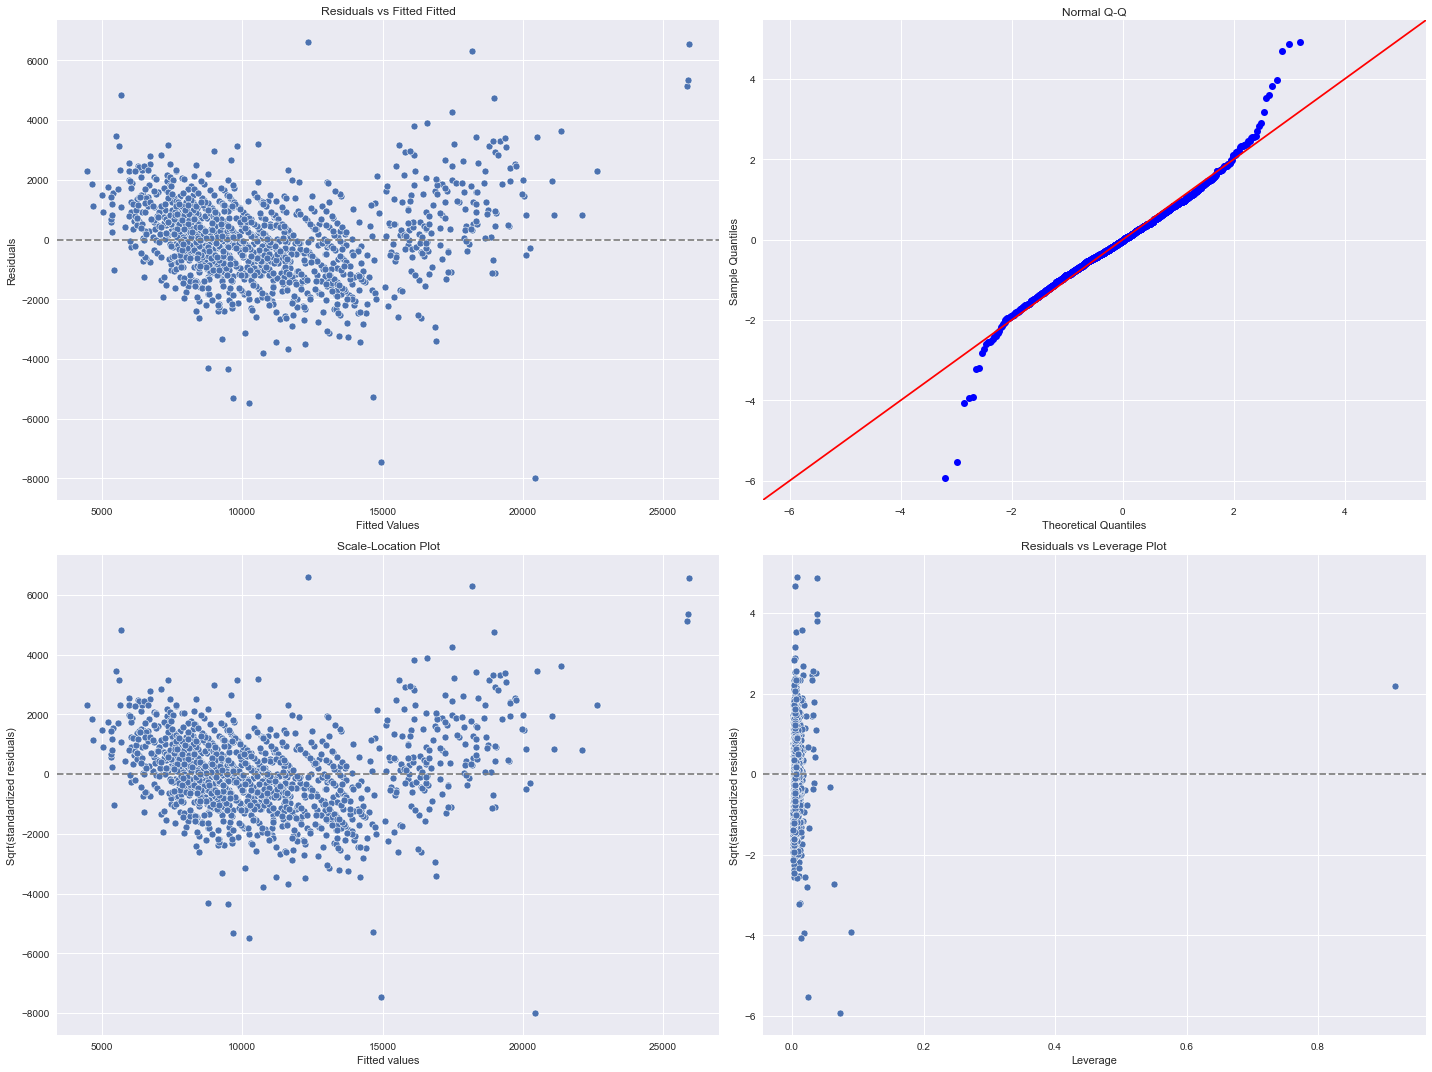

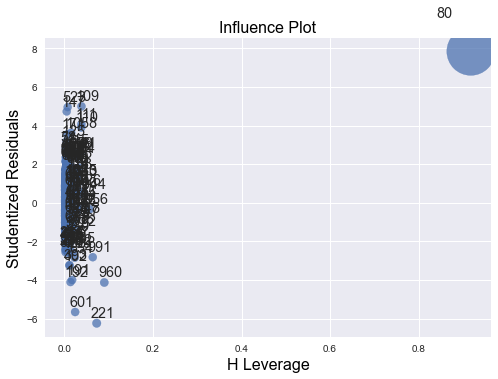

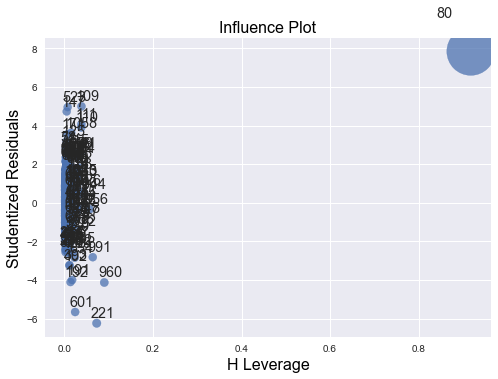

In [85]:
# Get different Variables for diagnostic
residuals = model.resid
fitted_value = model.fittedvalues
stand_resids = model.resid_pearson
influence = model.get_influence()
leverage = influence.hat_matrix_diag
  
# PLot different diagnostic plots
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(nrows=2, ncols=2)
  
plt.style.use('seaborn')
  
# Residual vs Fitted Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[0, 0])
ax[0, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[0, 0].set_xlabel('Fitted Values')
ax[0, 0].set_ylabel('Residuals')
ax[0, 0].set_title('Residuals vs Fitted Fitted')
  
# Normal Q-Q plot
smf.qqplot(residuals, fit=True, line='45',ax=ax[0, 1], c='#4C72B0')
ax[0, 1].set_title('Normal Q-Q')
  
# Scale-Location Plot
sns.scatterplot(x=fitted_value, y=residuals, ax=ax[1, 0])
ax[1, 0].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(standardized residuals)')
ax[1, 0].set_title('Scale-Location Plot')
  
# Residual vs Leverage Plot
sns.scatterplot(x=leverage, y=stand_resids, ax=ax[1, 1])
ax[1, 1].axhline(y=0, color='grey', linestyle='dashed')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Sqrt(standardized residuals)')
ax[1, 1].set_title('Residuals vs Leverage Plot')
  
plt.tight_layout()
plt.show()
  
# PLot Cook's distance plot
smf.graphics.influence_plot(model, criterion="cooks")

# Final Model

In [86]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_df = data.drop(data.index[80])

In [87]:
new_X = new_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
new_Y = new_df[['Price']]

In [88]:
final_model = smf.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [89]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:25:34   Log-Likelihood:                         -12524.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.510e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0191      2.684    -49.196      0.000    -137.283    -126.755
KM               -0.0210      0.001    -14.581      0.000      -0.024      -0.018
HP               43.7530      3.287     13.310      0.000      37.304      50.202
cc                0.3468      0.313      1.109      0.268      -0.267       0.960
Doors           270.3889     41.346      6.540      0.000     189.284     351.494
Gears          2394.0486     91.807     26.077      0.000    2213.957    2574.140
Quarterly_Tax    16.4778      1.520     10.843      0.000      13.497      19.459
==============================================================================
Omnibus:                      183.937   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.178
Skew:                           0.636   Prob(JB):                    3.82e-127
Kurtosis:                       5.849   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. Output Interpretation


1 - p-value < 0.01

Thus the model is accepted

2 - coefficient == -132.01

Thus if the value of x increased by 1, the predicted value of Price will decrease by 132.01

3 - Adj. R-sqared == 0.983

Thus the model explains 98.3% of the variance in dependent variable